In [254]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
import scipy.io as spio
from datetime import datetime, date, time
import pandas as pd
from pymatreader import read_mat
from pyts.utils import windowed_view
import matplotlib.pyplot as plt
import math 

In [255]:
#MQ-6 sensor analytical modelling 

Vcc=5
x1,x2=300,10000             #200,10000
y1,y2=0.22,0.019                 # 2, 0.4
x,y=1000,0.1
xmin,xmax=300,10000
Rl=4700          

In [256]:
m=(math.log10(y2)-math.log10(y1))/(math.log10(x2)-math.log10(x1))
c=10**(math.log10(y)-m*math.log10(x))

In [257]:
print('slope m and intercept c:',m,c)

slope m and intercept c: -0.6984594690587614 12.45599448224206


In [258]:
x=1000
Ro=10**((math.log10(Rl**2)-m*(math.log10(xmin)+math.log10(xmax))-2*math.log10(c))/2)
Rs=10**(m*(math.log10(x))+math.log10(c)+math.log10(Ro))
Rsmax=10**(m*(math.log10(xmin))+math.log10(c)+math.log10(Ro))
Rsmin=10**(m*(math.log10(xmax))+math.log10(c)+math.log10(Ro))

In [259]:
print('Ro,Rs, Rsmin, Rsmax:',Ro,Rs,Rsmin,Rsmax)

Ro,Rs, Rsmin, Rsmax: 68979.93599511862 6897.993599511862 1381.2214620663588 15993.090613399962


In [260]:
y=Rs/Ro
print('y:',y)

y: 0.1


In [261]:
VRlmin=(Rl*Vcc)/(Rsmax+Rl)
VRlmax=(Rl*Vcc)/(Rsmin+Rl)
VRlspan=((Rsmax-Rsmin)*Rl*Vcc)/((Rsmin+Rl)*(Rsmax+Rl))

In [262]:
print('VRlmin,VRlmax,VRlspan:',VRlmin,VRlmax,VRlspan)

VRlmin,VRlmax,VRlspan: 1.1356447637059301 3.8643552362940676 2.7287104725881375


In [263]:
dx=xmax-xmin

In [264]:
#Sensitivity
S=VRlspan/dx

In [265]:
S

0.00028131035799877706

In [266]:
VRl=Rl*Vcc/(Rs+Rl)
Rs=((Vcc/VRl)-1)*Rl
I=Vcc/(Rs+Rl)

In [267]:
Ps=((Vcc**2)*Rs)/((Rs+math.sqrt(Rsmin*Rsmax))**2)

In [268]:
Ps

0.0012820266887263161

In [269]:
0.5*(10**4)

5000.0

In [270]:
4.5*(10**4)

45000.0

In [271]:
Rsi=np.arange(Rsmin,Rsmax,0.1)

In [272]:
Rsi

array([ 1381.22146207,  1381.32146207,  1381.42146207, ...,
       15992.82146205, 15992.92146205, 15993.02146205])

In [273]:
Psi=((Vcc**2)*Rsi)/((Rsi+math.sqrt(Rsmin*Rsmax))**2)

In [274]:
Psi

array([0.00093373, 0.00093377, 0.0009338 , ..., 0.00093374, 0.00093374,
       0.00093373])

Text(0, 0.5, 'Sensor power dissipation Ps (W)')

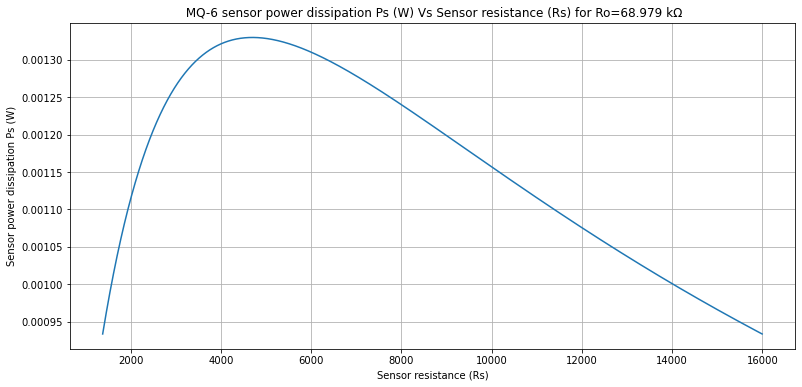

In [275]:
plt.figure(figsize=(13, 6))
plt.plot(Rsi,Psi)
plt.grid(True)
plt.title(' MQ-6 sensor power dissipation Ps (W) Vs Sensor resistance (Rs) for Ro=68.979 kΩ')
plt.xlabel("Sensor resistance (Rs)")
plt.ylabel("Sensor power dissipation Ps (W)")

In [276]:
ppm=10**(1/m*(math.log10(Rs/Ro)-math.log10(c)))

In [277]:
ppm

1000.000000000002

In [278]:
Rs_test=np.arange(Rsmin,Rsmax,0.1)

In [279]:
Rs_test

array([ 1381.22146207,  1381.32146207,  1381.42146207, ...,
       15992.82146205, 15992.92146205, 15993.02146205])

In [280]:
Ro

68979.93599511862

In [281]:
ppm=10**(1/m*(np.log10(Rs_test/Ro)-np.log10(c)))

In [282]:
ppm

array([10000.        ,  9998.96352879,  9997.92724002, ...,
         300.00722858,   300.00454285,   300.00185717])

Text(0, 0.5, 'Sensor Resistance (Rs)')

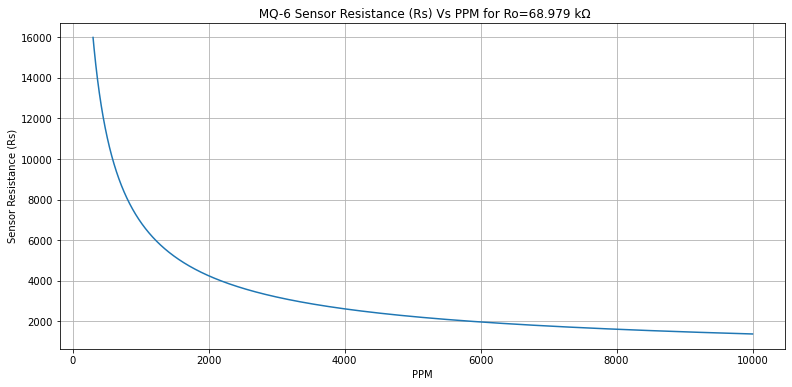

In [283]:
plt.figure(figsize=(13, 6))
plt.plot(ppm,Rs_test)
plt.grid(True)
plt.title(' MQ-6 Sensor Resistance (Rs) Vs PPM for Ro=68.979 kΩ')
plt.xlabel("PPM")
plt.ylabel("Sensor Resistance (Rs)")

Text(0, 0.5, 'Rs/Ro')

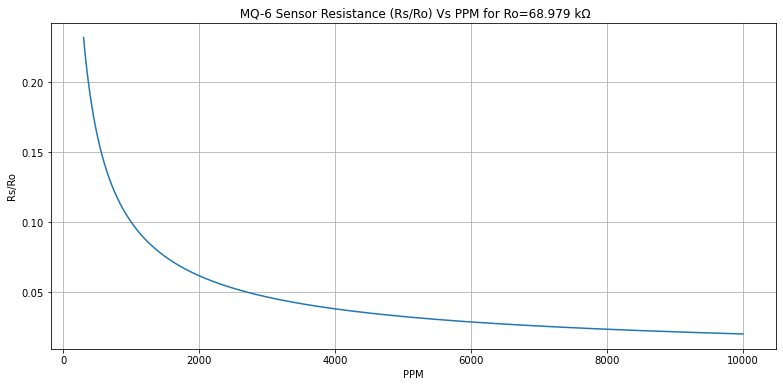

In [284]:
y=Rs_test/Ro
plt.figure(figsize=(13, 6))
plt.plot(ppm,y)
plt.grid(True)
plt.title(' MQ-6 Sensor Resistance (Rs/Ro) Vs PPM for Ro=68.979 kΩ')
plt.xlabel("PPM")
plt.ylabel("Rs/Ro")

Text(0, 0.5, 'Rs/Ro')

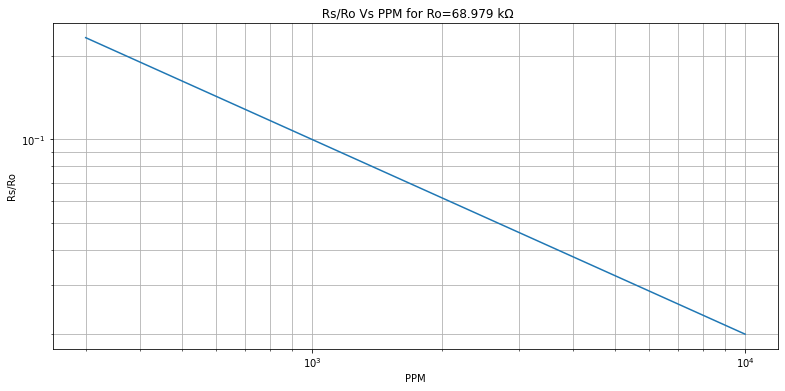

In [285]:
y=Rs_test/Ro
plt.figure(figsize=(13, 6))
plt.loglog(ppm,y)
plt.grid(True,which="both")
plt.title(' Rs/Ro Vs PPM for Ro=68.979 kΩ')
plt.xlabel("PPM")
plt.ylabel("Rs/Ro")

In [286]:
10**-1

0.1